In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')

In [3]:
#affinity_dff.count()
#covid_df.count()
geoids_df.count()

statefips        51
statename        51
stateabbrev      51
state_pop2019    51
dtype: int64

In [4]:
# Create date column
affinity_df.dtypes

year                     int64
month                    int64
day                      int64
statefips                int64
spend_acf              float64
spend_aer              float64
spend_all              float64
spend_all_inchigh       object
spend_all_inclow        object
spend_all_incmiddle    float64
spend_apg              float64
spend_grf              float64
spend_hcs              float64
spend_tws              float64
dtype: object

In [5]:
affinity_date = pd.to_datetime(affinity_df[['year', 'month', 'day']])
affinity_date

0      2020-01-24
1      2020-01-24
2      2020-01-24
3      2020-01-24
4      2020-01-24
          ...    
7441   2020-06-17
7442   2020-06-17
7443   2020-06-17
7444   2020-06-17
7445   2020-06-17
Length: 7446, dtype: datetime64[ns]

In [6]:
affinity_df["date"] = affinity_date
affinity_df = affinity_df[ ['date'] + [ col for col in affinity_df.columns if col != 'date' ] ]
affinity_df

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7442,2020-06-17,2020,6,17,53,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7443,2020-06-17,2020,6,17,54,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7444,2020-06-17,2020,6,17,55,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [7]:
covid_date = pd.to_datetime(covid_df[['year', 'month', 'day']])
covid_date

0      2020-01-21
1      2020-01-21
2      2020-01-21
3      2020-01-21
4      2020-01-21
          ...    
8920   2020-07-13
8921   2020-07-13
8922   2020-07-13
8923   2020-07-13
8924   2020-07-13
Length: 8925, dtype: datetime64[ns]

In [8]:
# add created date column to covid_df
covid_df["date"] = covid_date
covid_df = covid_df[ ['date'] + [ col for col in covid_df.columns if col != 'date' ] ]
covid_df

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.
...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27
8921,2020-07-13,2020,7,13,53,572.0,9.42
8922,2020-07-13,2020,7,13,54,241.0,6.94
8923,2020-07-13,2020,7,13,55,697.0,13


In [17]:
# Merge covid and affinity dataframes
merge1_df = pd.merge(covid_df, affinity_df, on=["date", "statefips"], how="left")
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8921,2020-07-13,2020,7,13,53,572.0,9.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8922,2020-07-13,2020,7,13,54,241.0,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8923,2020-07-13,2020,7,13,55,697.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
merge1_df = merge1_df.dropna(how='any')
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,2020-06-17,2020,6,17,51,653.0,6.02,2020.0,6.0,17.0,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7595,2020-06-17,2020,6,17,53,371.0,4.37,2020.0,6.0,17.0,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7596,2020-06-17,2020,6,17,54,133.0,1.46,2020.0,6.0,17.0,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7597,2020-06-17,2020,6,17,55,449.0,5.09,2020.0,6.0,17.0,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [59]:
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")
del merge2_df['year_y']
del merge2_df['month_y']
del merge2_df['day_y']
merge2_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [61]:
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [25]:
reduced_merge2 = merge2_df.loc[:,["date", "year_x", "month_x", "day_x", "statefips", "statename", "case_rate", "spend_all_inchigh",
                       "spend_all_incmiddle", "spend_all_inclow"]]
reduced_merge2

,date,year_x,month_x,day_x,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
0,2020-01-24,2020,1,24,1,Alabama,0.0,0.0219,0.00687,0.000657
1,2020-01-24,2020,1,24,2,Alaska,0.0,-0.0106,-0.06990,.
2,2020-01-24,2020,1,24,4,Arizona,0.0,-0.00749,-0.01670,-0.00918
3,2020-01-24,2020,1,24,5,Arkansas,0.0,0.0048,-0.01080,-0.00166
4,2020-01-24,2020,1,24,6,California,0.0,0.00719,0.00905,0.0124
...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,Virginia,653.0,-0.148,-0.07610,0.00955
7442,2020-06-17,2020,6,17,53,Washington,371.0,-0.17,-0.08700,-0.162
7443,2020-06-17,2020,6,17,54,West Virginia,133.0,-0.0685,0.01260,0.00212
7444,2020-06-17,2020,6,17,55,Wisconsin,449.0,-0.1,-0.08550,-0.123


In [27]:
reduced_merge2 = reduced_merge2.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
reduced_merge2

,date,year,month,day,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
0,2020-01-24,2020,1,24,1,Alabama,0.0,0.0219,0.00687,0.000657
1,2020-01-24,2020,1,24,2,Alaska,0.0,-0.0106,-0.06990,.
2,2020-01-24,2020,1,24,4,Arizona,0.0,-0.00749,-0.01670,-0.00918
3,2020-01-24,2020,1,24,5,Arkansas,0.0,0.0048,-0.01080,-0.00166
4,2020-01-24,2020,1,24,6,California,0.0,0.00719,0.00905,0.0124
...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,Virginia,653.0,-0.148,-0.07610,0.00955
7442,2020-06-17,2020,6,17,53,Washington,371.0,-0.17,-0.08700,-0.162
7443,2020-06-17,2020,6,17,54,West Virginia,133.0,-0.0685,0.01260,0.00212
7444,2020-06-17,2020,6,17,55,Wisconsin,449.0,-0.1,-0.08550,-0.123


In [66]:
jun17_df = reduced_merge2[reduced_merge2['date'] == '2020-06-17']
jun17_df

,date,year,month,day,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
7395,2020-06-17,2020,6,17,1,Alabama,557.0,-0.11,-0.01920,0.00901
7396,2020-06-17,2020,6,17,2,Alaska,106.0,-0.128,-0.13800,.
7397,2020-06-17,2020,6,17,4,Arizona,565.0,-0.13,-0.10400,-0.137
7398,2020-06-17,2020,6,17,5,Arkansas,451.0,-0.159,0.02330,0.0192
7399,2020-06-17,2020,6,17,6,California,413.0,-0.187,-0.16500,-0.172
7400,2020-06-17,2020,6,17,8,Colorado,515.0,-0.115,-0.11500,-0.0857
7401,2020-06-17,2020,6,17,9,Connecticut,1274.0,-0.136,-0.12800,-0.136
7402,2020-06-17,2020,6,17,10,Delaware,1073.0,-0.093,-0.08750,-0.0927
7403,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,-0.243,-0.20300,-0.0304
7404,2020-06-17,2020,6,17,12,Florida,385.0,-0.0836,-0.04130,-0.0211


In [70]:
top5_states = jun17_df.sort_values('case_rate',ascending = False).head(5)
top5_states

,date,year,month,day,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
7427,2020-06-17,2020,6,17,36,New York,2004.0,-0.127,-0.0603,-0.0501
7425,2020-06-17,2020,6,17,34,New Jersey,1888.0,-0.107,-0.0377,-0.00771
7416,2020-06-17,2020,6,17,25,Massachusetts,1540.0,-0.108,-0.0254,-0.0259
7434,2020-06-17,2020,6,17,44,Rhode Island,1530.0,-0.205,-0.2040,-0.161
7403,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,-0.243,-0.2030,-0.0304


In [40]:
florida_df = reduced_merge2.loc[reduced_merge2["statename"] == "Florida"]
florida_df

,date,year,month,day,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
9,2020-01-24,2020,1,24,12,Florida,0.0,-0.0133,-0.01070,-0.0249
60,2020-01-25,2020,1,25,12,Florida,0.0,-0.0118,-0.00917,-0.0215
111,2020-01-26,2020,1,26,12,Florida,0.0,-0.00767,-0.00700,-0.0176
162,2020-01-27,2020,1,27,12,Florida,0.0,-0.00858,0.00170,-0.0147
213,2020-01-28,2020,1,28,12,Florida,0.0,-0.0105,0.00315,-0.00789
...,...,...,...,...,...,...,...,...,...,...
7200,2020-06-13,2020,6,13,12,Florida,342.0,-0.0953,-0.05570,-0.025
7251,2020-06-14,2020,6,14,12,Florida,352.0,-0.0946,-0.04920,-0.0215
7302,2020-06-15,2020,6,15,12,Florida,360.0,-0.105,-0.05500,-0.029
7353,2020-06-16,2020,6,16,12,Florida,373.0,-0.091,-0.04570,-0.0245


In [64]:
eom_df = florida_df[florida_df['date'].isin(['2020-01-31', '2020-02-28', '2020-03-30'])]
eom_df

,date,year,month,day,statefips,statename,case_rate,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
366,2020-01-31,2020,1,31,12,Florida,0.0,-0.0024,0.00407,0.0217
1794,2020-02-28,2020,2,28,12,Florida,0.0,-0.0259,-0.03030,-0.0306
3375,2020-03-30,2020,3,30,12,Florida,26.5,-0.325,-0.28400,-0.261


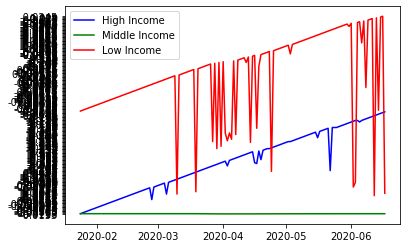

In [43]:
high_inc, = plt.plot(florida_df["date"], florida_df["spend_all_inchigh"], color="blue", label="High Income" )
mid_inc, = plt.plot(florida_df["date"], florida_df["spend_all_incmiddle"], color="green", label="Middle Income" )
low_inc, = plt.plot(florida_df["date"], florida_df["spend_all_inclow"], color="red", label="Low Income" )


# Create a legend for our chart
plt.legend(handles=[high_inc, mid_inc, low_inc], loc="best")

# Show the chart
plt.show()

In [ ]:
years = average_unemployment.keys()